Populating the interactive namespace from numpy and matplotlib
3756


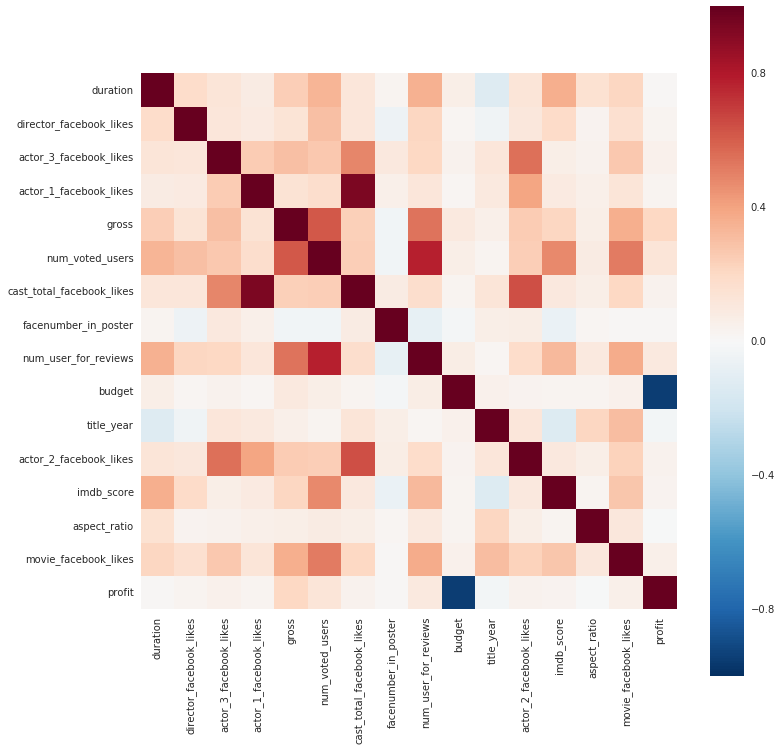

Minimum Square Error: 0.76152777831
R-Square: 0.313219050561


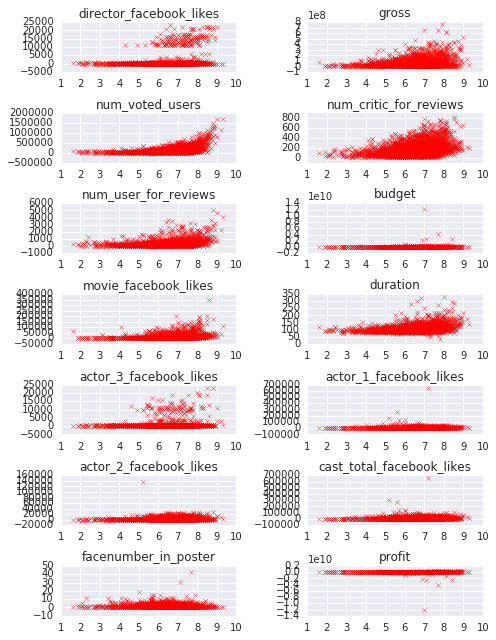

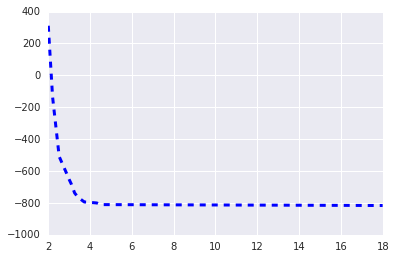

1.02716320835e-18
Rsq Lasso:  0.31317993081


715.115315218339

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LinearRegression, LassoLarsIC
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import train_test_split
import seaborn as sns

%pylab inline
#Reading from csv
imdb_movie_base = pd.read_csv('C:/Users/schttrj1/Desktop/CompBackup/Courses_Fall_2016/Data_Science_Appln/Final Project/movie_metadata.csv')
imdb_movie_base['profit'] = imdb_movie_base['gross'] - imdb_movie_base['budget']

#Cleaning the data
imdb_movie = imdb_movie_base.dropna(axis=0)
print len(imdb_movie)

#Plotting histogram for imdb_score
imdb_score = imdb_movie['imdb_score']
# plt.hist(imdb_score,bins=20)
# plt.show()
corr = imdb_movie.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)
plt.show()

list_fig = ['director_facebook_likes','gross','num_voted_users','num_critic_for_reviews','num_user_for_reviews','budget',\
            'movie_facebook_likes','duration','actor_3_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',\
           'cast_total_facebook_likes','facenumber_in_poster','profit']

data = imdb_movie[list_fig]
target = imdb_movie['imdb_score']

xtrain, xtest, ytrain, ytest = train_test_split(data,target,train_size=0.75)
#First step: Using Simple Linear Regression
model = LinearRegression()
model.fit(xtrain,ytrain)
mse = np.mean((model.predict(xtest) - ytest) ** 2)
print 'Minimum Square Error:', mse
print 'R-Square:', model.score(xtest,ytest)


#Scatter plots
plt.figure(figsize=(7,10))
for i in range(len(list_fig)):
    plt.subplot(8,2,i+1)
    plt.title(list_fig[i])
    plt.scatter(imdb_score,imdb_movie[list_fig[i]],marker='x',color='r',label='dir_score')    
plt.tight_layout()
plt.show()


# alpha selection through aic/bic 
aic_m = LassoLarsIC(criterion='aic')
aic_m.fit(xtrain, ytrain)
alphas_ = aic_m.alphas_
criterion_ = aic_m.criterion_
plt.plot(-np.log10(alphas_), criterion_, '--', color='b',
             linewidth=3)
plt.show()
print aic_m.alpha_

model_L = Lasso(alpha=0.0003)
model_L.fit(xtrain,ytrain)
ypred = model_L.predict(xtest)
mse2 = np.sum((ypred - ytest) ** 2)
rsq = model_L.score(xtest,ytest)
print 'Rsq Lasso: ', rsq
mse2



Populating the interactive namespace from numpy and matplotlib


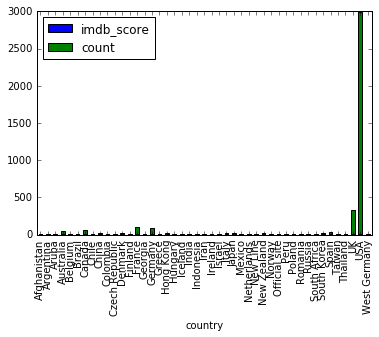

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
#Reading from csv
imdb_movie_base = pd.read_csv('C:/Users/schttrj1/Desktop/CompBackup/Courses_Fall_2016/Data_Science_Appln/Final Project/movie_metadata.csv')

#Cleaning the data
imdb_movie = imdb_movie_base.dropna(axis=0)

rating = imdb_movie['imdb_score']
# print imdb_movie['country']
avg_rating_by_year = imdb_movie[['imdb_score']].groupby(imdb_movie['country'])
count_bycountry = avg_rating_by_year.count()
# print avg_rating_by_year.mean()

# newpd = pd.DataFrame()
newpd = avg_rating_by_year.mean()
newpd['count'] = count_bycountry

# print avg_rating_by_year
newpd.plot(kind='bar',stacked='True')


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
#Reading from csv
imdb_movie_base = pd.read_csv('C:/Users/schttrj1/Desktop/CompBackup/Courses_Fall_2016/Data_Science_Appln/Final Project/movie_metadata.csv')
imdb_movie_base['profit'] = imdb_movie_base['gross'] - imdb_movie_base['budget']

#Cleaning the data
imdb_movie = imdb_movie_base.dropna(axis=0)
print len(imdb_movie)
print imdb_movie[['budget','movie_title']].sort('budget',ascending=False).head(10)
print imdb_movie[imdb_movie['budget']==imdb_movie['budget'].max()]

Populating the interactive namespace from numpy and matplotlib
3756
            budget              movie_title
2988  1.221550e+10                The Host 
3859  4.200000e+09          Lady Vengeance 
3005  2.500000e+09                Fateless 
2323  2.400000e+09       Princess Mononoke 
2334  2.127520e+09                Steamboy 
3423  1.100000e+09                   Akira 
4542  1.000000e+09           Godzilla 2000 
3075  7.000000e+08  Kabhi Alvida Naa Kehna 
3851  7.000000e+08                   Tango 
1338  5.536320e+08               Red Cliff 
      color director_name  num_critic_for_reviews  duration  \
2988  Color  Joon-ho Bong                   363.0     110.0   

      director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
2988                    584.0                    74.0  Kang-ho Song   

      actor_1_facebook_likes      gross                      genres  \
2988                   629.0  2201412.0  Comedy|Drama|Horror|Sci-Fi   

          ...      language      co

C:\Users\schttrj1\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
